In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df["Total_Score"]=df['math_score']+df['reading_score']+df['writing_score']
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [4]:
df["average"]=(df['math_score']+df['reading_score']+df['writing_score'])/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [5]:
# Define Numeric Features and Categorial Features
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O' ]

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['math_score', 'reading_score', 'writing_score', 'Total_Score', 'average']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Converting Categorical Data into Numeric data

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
LE=LabelEncoder()

In [8]:
#For Gender
print(df['gender'].value_counts())

gender
female    518
male      482
Name: count, dtype: int64


In [9]:
df['gender']=LE.fit_transform(df['gender'])
print(df['gender'].value_counts())
#Female=0 Male=1

gender
0    518
1    482
Name: count, dtype: int64


In [10]:
#For Race And Ethnicity
print(df['race_ethnicity'].value_counts())

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


In [11]:
df['race_ethnicity']=LE.fit_transform(df['race_ethnicity'])
print(df['race_ethnicity'].value_counts())

'''
Group A = 0
Group B = 1
Group C = 2
Group D = 3
Group E = 4
'''

race_ethnicity
2    319
3    262
1    190
4    140
0     89
Name: count, dtype: int64


'\nGroup A = 0\nGroup B = 1\nGroup C = 2\nGroup D = 3\nGroup E = 4\n'

In [12]:
#For parental_level_of_education
print(df['parental_level_of_education'].value_counts())


parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


In [13]:
df['parental_level_of_education']=LE.fit_transform(df['parental_level_of_education'])
print(df['parental_level_of_education'].value_counts())

parental_level_of_education
4    226
0    222
2    196
5    179
1    118
3     59
Name: count, dtype: int64


In [14]:
#For Lunch
print(df['lunch'].value_counts())

lunch
standard        645
free/reduced    355
Name: count, dtype: int64


In [15]:

df['lunch']=LE.fit_transform(df['lunch'])
print(df['lunch'].value_counts())


lunch
1    645
0    355
Name: count, dtype: int64


In [16]:
#For Test Course
print(df['test_preparation_course'].value_counts())

test_preparation_course
none         642
completed    358
Name: count, dtype: int64


In [17]:

df['test_preparation_course']=LE.fit_transform(df['test_preparation_course'])
print(df['test_preparation_course'].value_counts())


test_preparation_course
1    642
0    358
Name: count, dtype: int64


In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,average
0,0,1,1,1,1,72,72,74,218,72.666667
1,0,2,4,1,0,69,90,88,247,82.333333
2,0,1,3,1,1,90,95,93,278,92.666667
3,1,0,0,0,1,47,57,44,148,49.333333
4,1,2,4,1,1,76,78,75,229,76.333333


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int32  
 1   race_ethnicity               1000 non-null   int32  
 2   parental_level_of_education  1000 non-null   int32  
 3   lunch                        1000 non-null   int32  
 4   test_preparation_course      1000 non-null   int32  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   Total_Score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int32(5), int64(4)
memory usage: 58.7 KB


In [20]:
df.describe()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,average
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,0.642000,66.08900,69.169000,68.054000,203.312000,67.770667
std,0.499926,1.157179,1.829522,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.00000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000


## We Have to Predict Total Score


In [21]:
columns_to_drop =['Total_Score','average']


In [22]:
X=df.drop(columns=columns_to_drop,axis=1)
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [23]:
Y=df['Total_Score']
Y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: Total_Score, Length: 1000, dtype: int64

## Scaling Data

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
X=scaler.fit_transform(X)
X

array([[-0.96462528, -1.01504393, -0.81264039, ...,  0.39002351,
         0.19399858,  0.39149181],
       [-0.96462528, -0.15044092,  0.82795259, ...,  0.19207553,
         1.42747598,  1.31326868],
       [-0.96462528, -1.01504393,  0.28108826, ...,  1.57771141,
         1.77010859,  1.64247471],
       ...,
       [-0.96462528, -0.15044092, -0.26577606, ..., -0.46775108,
         0.12547206, -0.20107904],
       [-0.96462528,  0.71416208,  0.82795259, ...,  0.12609287,
         0.60515772,  0.58901542],
       [-0.96462528,  0.71416208,  0.82795259, ...,  0.71993682,
         1.15336989,  1.18158627]])

In [26]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((700, 8), (300, 8))

In [27]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

# Create an Evaluate Function to give all metrics after model Training

In [28]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0826
- Mean Absolute Error: 0.8663
- R2 Score: 0.9993
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1783
- Mean Absolute Error: 0.9291
- R2 Score: 0.9993


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0269
- Mean Absolute Error: 0.0216
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0293
- Mean Absolute Error: 0.0228
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7.4185
- Mean Absolute Error: 5.5146
- R2 Score: 0.9682
-----------------------

# Result

In [30]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.999316
7,CatBoosting Regressor,0.994438
5,Random Forest Regressor,0.992704
6,XGBRegressor,0.992387
4,Decision Tree,0.982348
8,AdaBoost Regressor,0.970850
3,K-Neighbors Regressor,0.939785


In [31]:
model = RandomForestRegressor()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.36


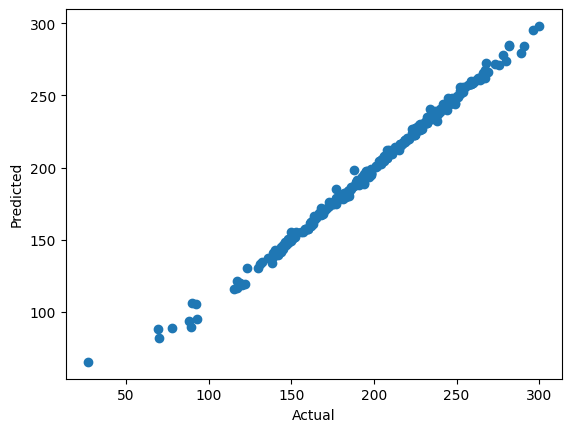

In [32]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='Total_Score'>

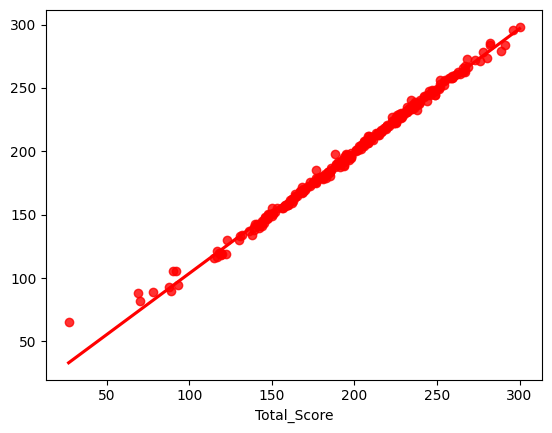

In [33]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')


In [34]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,261,260.09,0.91
737,192,191.21,0.79
740,225,222.55,2.45
660,224,225.06,-1.06
411,245,245.00,0.00
...,...,...,...
468,250,249.49,0.51
935,191,187.60,3.40
428,177,174.68,2.32
7,122,119.18,2.82
